In [4]:
import sys
from pathlib import Path
PROJECT_ROOT = Path.cwd().parent
SRC_DIR = PROJECT_ROOT / 'src'
DATA_RAW_DIR = PROJECT_ROOT / 'data' / 'raw' / 'psychiatric-motor-activity-dataset'
sys.path.append(str(SRC_DIR))
from core.pma_base import PMActivity
#from core.pma_base import PMAPerson
from core.pma_base import PMADataADHDKaggle
import matplotlib.pyplot as plt
import pandas as pd

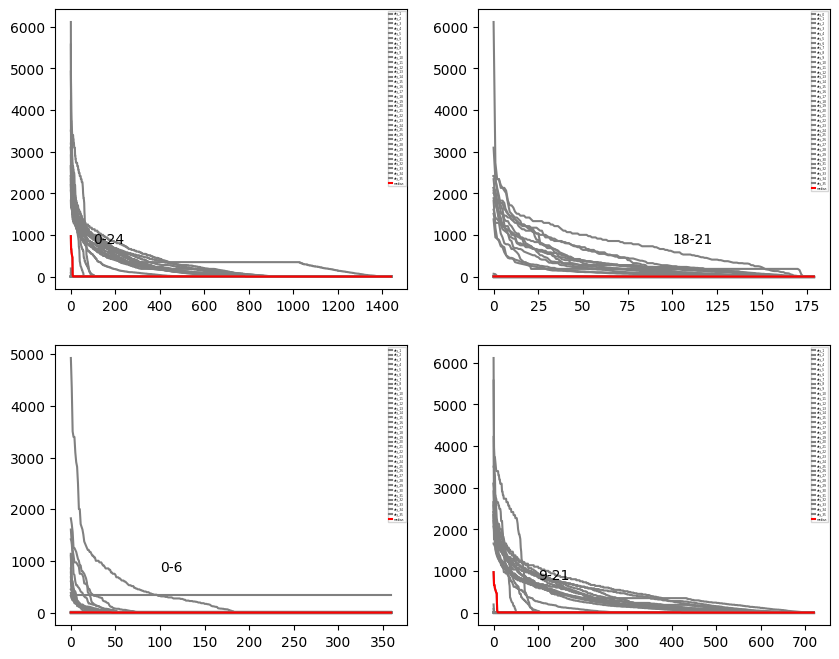

In [5]:
pat = 'control_1' # 'schizophrenia_3'  'clinical_31'  'depression_10'
p = PMADataADHDKaggle(pat) # schizophrenia_3  clinical_31  depression_10
#day=-1; start_hour=12; end_hour=15
#p.activity.activity_day_from_to_hour(day, start_hour, end_hour)

#L = p.activity.ordered_activities(0,24)
'''
median_values = []
for m in range(1440):
    values = []
    for key in L.keys():
        ord_act = L[key]
        if not (ord_act is None):
            values.append(ord_act[m])
    median_values.append( stat.median(values) )

L['median'] = median_values
L.keys()
'''
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(10,8))

p.activity.plot_ordered_activities(ax[0,0],  0, 24) 
p.activity.plot_ordered_activities(ax[0,1],  18, 21) 
p.activity.plot_ordered_activities(ax[1,0],  0, 6) 
p.activity.plot_ordered_activities(ax[1,1],  9, 21)



1170


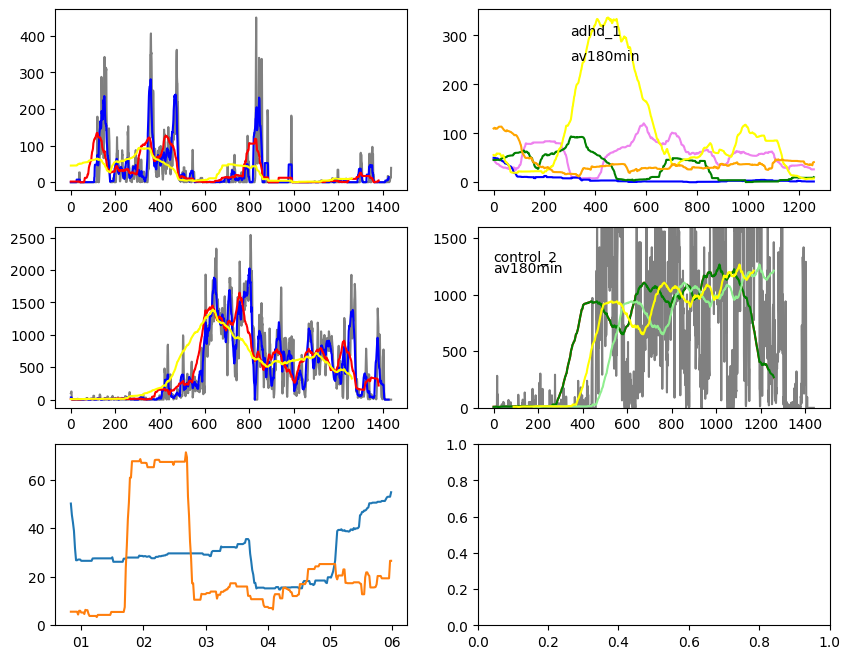

In [19]:
import numpy as np
pat = 'adhd_1' 
#pat = 'clinical_1'  
#pat = 'control_1'
#pat = 'depression_10'
#pat = 'schizophrenia_3'  

p = PMADataADHDKaggle(pat) 

smoothy4=p.activity.smoothed_activities(start_hour=0, end_hour=24, window=4)
smoothy15=p.activity.smoothed_activities(start_hour=0, end_hour=24, window=15)
smoothy60=p.activity.smoothed_activities(start_hour=0, end_hour=24, window=60)
smoothy180=p.activity.smoothed_activities(start_hour=0, end_hour=24, window=180)

fig, ax = plt.subplots(nrows=3,ncols=2, figsize=(10,8))

ax[0,0].plot(smoothy4['day_3'], color='grey')
ax[0,0].plot(smoothy15['day_3'],color='blue')
ax[0,0].plot(smoothy60['day_3'],color='red')
ax[0,0].plot(smoothy180['day_3'],color='yellow')

ax[0,1].plot(smoothy180['day_1'], color='violet')
ax[0,1].plot(smoothy180['day_2'], color='blue')
ax[0,1].plot(smoothy180['day_3'], color='green')
ax[0,1].plot(smoothy180['day_4'], color='yellow')
ax[0,1].plot(smoothy180['day_5'],color='orange')
#ax[0,1].plot(smoothy180['day_6'],color='red')
#ax[0,1].plot(smoothy180['day_7'], color='black')
ax[0,1].text(300,300,pat)
ax[0,1].text(300,250,'av180min')


pat = 'control_2' 


p = PMADataADHDKaggle(pat) 

smoothy4=p.activity.smoothed_activities(start_hour=0, end_hour=24, window=4)
smoothy15=p.activity.smoothed_activities(start_hour=0, end_hour=24, window=15)
smoothy60=p.activity.smoothed_activities(start_hour=0, end_hour=24, window=60)
smoothy180=p.activity.smoothed_activities(start_hour=0, end_hour=24, window=180)


ax[1,0].plot(smoothy4['day_3'], color='grey')
ax[1,0].plot(smoothy15['day_3'],color='blue')
ax[1,0].plot(smoothy60['day_3'],color='red')
ax[1,0].plot(smoothy180['day_3'],color='yellow')

#ax[1,1].plot(smoothy180['day_1'], color='violet')
#ax[1,1].plot(smoothy180['day_2'], color='blue')
#ax[1,1].plot(smoothy180['day_3'], color='green')
#ax[1,1].plot(smoothy180['day_4'], color='yellow')
#ax[1,1].plot(smoothy180['day_5'],color='orange')
ax[1,1].plot(smoothy180['day_6'],color='red')
#ax[1,1].plot(smoothy60['day_7'], color='black')
ax[1,1].text(0,1300,pat)
ax[1,1].text(0,1200,'av180min')

activity=p.activity.activity_day_from_to_hour(day=6,start_hour=0, end_hour=24)
ax[1,1].plot(list(activity.iloc[:,1]), color = 'grey')
forward=[]
backward=[]
window=180
dayminutes=1440
last_i = dayminutes-window
for i in range(last_i):
    forward.append(activity.iloc[i:i+window,1].mean())
    if i<window:
        backward.append(np.nan)
    else:
        backward.append(activity.iloc[i-window:i,1].mean())
ax[1,1].plot(forward, color='green')
ax[1,1].plot(backward, color='lightgreen')
centered = backward[window//2:]
print(len(centered))
ax[1,1].plot(centered, color='yellow')
ax[1,1].set_ylim(0,1600)
day6 = p.activity.activity_timeseries.iloc[6*1440:8*1440,:]
day6 = p.activity.activity_timeseries.iloc[13*710:13*720+180,:]
#day6["time"] = pd.to_datetime(day6["timestamp"]).dt.time
ax[2,0].plot(day6.loc[:,'timestamp'], day6.loc[:,'smo180'])
ax[2,0].plot(day6.loc[:,'timestamp'], day6.loc[:,'smo60'])
import matplotlib.dates as mdates

ax[2,0].xaxis.set_major_formatter(mdates.DateFormatter("%H"))



In [ ]:
# user,      mean,             sd,               pctZeros,         median, q25, q75,class
# control_1, 185.568055555556, 346.555785796322, 38.6805555555556, 37.5,   0,   201,control
p.activity.activity_day_from_to_hour(1,0,24).loc[:,'activity'].describe()


count    1440.000000
mean      185.568056
std       346.555786
min         0.000000
25%         0.000000
50%        37.500000
75%       201.000000
max      3097.000000
Name: activity, dtype: float64

C:\Users\Trainee\Documents\Hallo_DPP\data
['adhd_1', 'adhd_2', 'adhd_3', 'adhd_5', 'adhd_8', 'adhd_11', 'adhd_13', 'adhd_14', 'adhd_19', 'adhd_20', 'adhd_21', 'adhd_26', 'adhd_41', 'adhd_43', 'adhd_45', 'adhd_48', 'adhd_49', 'adhd_51', 'adhd_52', 'adhd_55', 'adhd_57', 'adhd_58', 'adhd_59', 'adhd_60', 'adhd_63', 'adhd_65', 'adhd_67', 'adhd_68', 'adhd_71', 'adhd_72', 'adhd_74', 'adhd_75', 'adhd_77', 'adhd_83', 'adhd_84', 'adhd_85', 'adhd_87', 'adhd_88', 'adhd_91', 'adhd_92', 'adhd_94', 'adhd_95', 'adhd_97', 'adhd_98', 'adhd_108']
['clinical_7', 'clinical_9', 'clinical_10', 'clinical_15', 'clinical_18', 'clinical_22', 'clinical_23', 'clinical_24', 'clinical_27', 'clinical_30', 'clinical_31', 'clinical_32', 'clinical_33', 'clinical_34', 'clinical_35', 'clinical_36', 'clinical_37', 'clinical_39', 'clinical_42', 'clinical_44', 'clinical_46', 'clinical_47', 'clinical_50', 'clinical_53', 'clinical_56', 'clinical_61', 'clinical_64', 'clinical_70', 'clinical_73', 'clinical_78', 'clinical_79', 'c

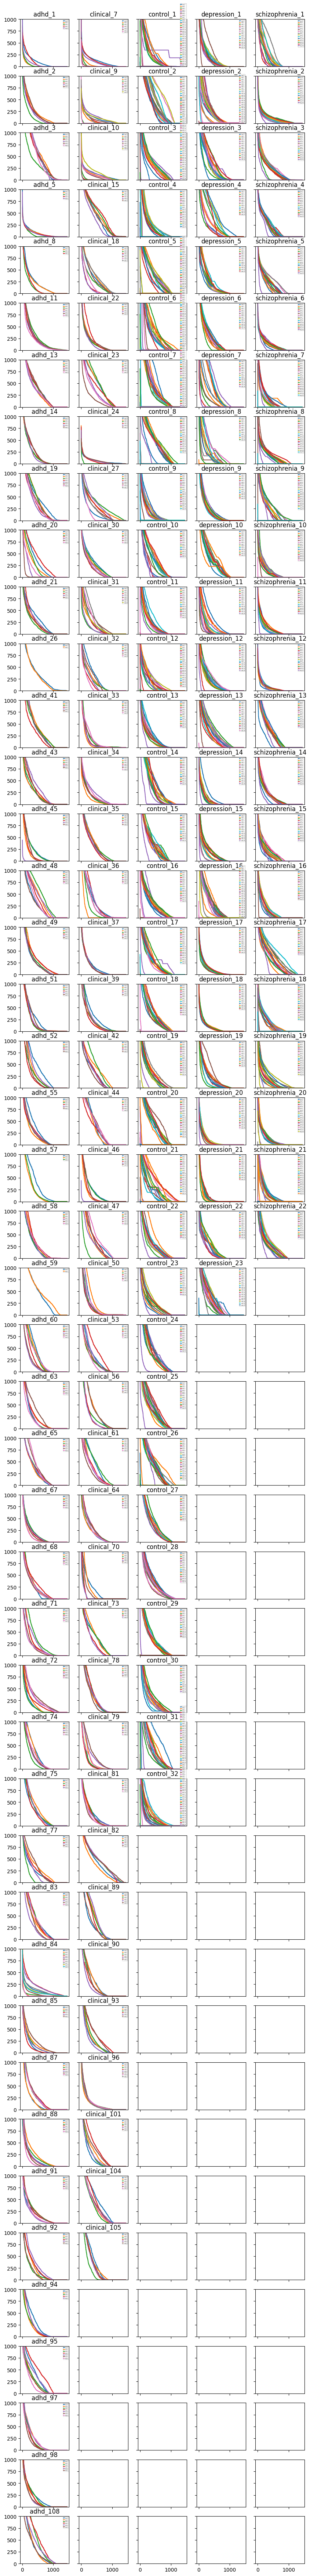

In [1]:
import sys
from pathlib import Path
PROJECT_ROOT = Path.cwd().parent
SRC_DIR = PROJECT_ROOT / 'src'
DATA_RAW_DIR = PROJECT_ROOT / 'data' / 'raw' / 'psychiatric-motor-activity-dataset'
sys.path.append(str(SRC_DIR))
from core.pma_base import PMActivity
#from core.pma_base import PMAPerson
from core.pma_base import PMADataADHDKaggle
import matplotlib.pyplot as plt
import pandas as pd

diags  = ['adhd', 'clinical', 'control', 'depression', 'schizophrenia']
pat_lists = {}
max_npat = 0
for diag in diags:
    df = pd.read_csv(DATA_RAW_DIR / f"{diag}-info.csv")
    pat_lists[diag] = list(df.loc[:,'number'])
    print(pat_lists[diag])
    npat = len(pat_lists[diag])
    max_npat = max(max_npat, npat)

fig, ax = plt.subplots(ncols=len(diags),nrows=max_npat,figsize=(10,2*max_npat), sharex=True, sharey=True)
ax[0,0].set_ylim(0, 1000)

#def plot_all(plot_function,)

for idiag in range(len(diags)):
    diag = diags[idiag]
    pat_list = pat_lists[diag]
    print(pat_list)
    pat_id = pat_list[0]
    for ipat_id in range(len(pat_list)):
        pat_id = pat_list[ipat_id]
        p = PMADataADHDKaggle(pat_id)
        p.activity.plot_ordered_activity_24h(ax[ipat_id,idiag], p.id)

plt.show()
#fig.savefig('all_ordered_activity_8am10pm', dpi=300, bbox_inches='tight')



In [12]:
import sys
from pathlib import Path
PROJECT_ROOT = Path.cwd().parent
SRC_DIR = PROJECT_ROOT / 'src'
DATA_RAW_DIR = PROJECT_ROOT / 'data' / 'raw' / 'psychiatric-motor-activity-dataset'
sys.path.append(str(SRC_DIR))
from core.pma_base import PMActivity
#from core.pma_base import PMAPerson
from core.pma_base import PMADataADHDKaggle
import matplotlib.pyplot as plt
import pandas as pd
p = PMADataADHDKaggle('control_20')
p.activity.ordered_activity_8am10pm_debug(5)

AttributeError: 'PMActivity' object has no attribute 'ordered_activity_8am10pm_debug'

In [ ]:
# old stuff
dir_data_raw='../data/raw/psychiatric-motor-activity-dataset/'
dis = 'adhd'
print(dis)
#dis = 'depression'
#dis = 'schizophrenia'
#dis = 'clinic'
#dis = 'control'
pat = '1'
#import os
#os.listdir(dir_data_raw + dis + '/')
#filename=#
import pandas as pd
acty_rawfile = dir_data_raw + dis + '/' + dis + '_' + pat + '.csv'
df = pd.read_csv(acty_rawfile,parse_dates=["timestamp"])
print(df.head())

bla=PMActivity(df)
print(type(bla.meas_begin_time.minute))
print(bla.meas_end_datetime)
print(bla.meas_duration.days)
print(bla.meas_duration)
print(bla.meas_days)
print(bla.meas_minutes)
print(bla.meas_minutes_to_12pm)


import matplotlib.pyplot as plt
fig,ax = plt.subplots(2,2,figsize=(5,5), sharex=True, sharey=True)
bla.plot_ordered_activity_24h(ax[1,0])

dis = 'schizophrenia'
acty_rawfile = dir_data_raw + dis + '/' + dis + '_' + pat + '.csv'
df = pd.read_csv(acty_rawfile,parse_dates=["timestamp"])
bla=PMActivity(df)
bla.plot_ordered_activity_24h(ax[0,1])

In [12]:
import statistics as stat
stat.median([1,2,3,4,4,6,8,9])

4.0